# Проект 2. Исследовательский анализ данных

## 1. Предобработка данных и предварительный анализ

### Изучение информации о файле

Выводим файл и смотрим общую информацию о данных.

In [1]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv')
print(data.head())

  building_series_id\ttotal_images\tlast_price\ttotal_area\tfirst_day_exposition\trooms\tceiling_height\tfloors_total\tliving_area\tfloor\tis_apartment\tstudio\tarea\topen_plan\tkitchen_area\tbalcony\tlocality_name\tairports_nearest\tcityCenters_nearest\tparks_around3000\tparks_nearest\tponds_around3000\tponds_nearest\tdays_exposition
0  1564812\t20\t13000000.0\t108.0\t2019-03-07T00:...                                                                                                                                                                                                                                                                                            
1  \t7\t3350000.0\t40.4\t2018-12-04T00:00:00\t1\t...                                                                                                                                                                                                                                                                                  

В данном случае разделитель - знак табуляции, а не запятая, необходимо добавить уточнение в функцию read_csv.

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
print(data.head())

  building_series_id  total_images  last_price  total_area  \
0            1564812            20  13000000.0       108.0   
1                NaN             7   3350000.0        40.4   
2         Сталинский            10   5196000.0        56.0   
3                NaN             0  64900000.0       159.0   
4                NaN             2  10000000.0       100.0   

  first_day_exposition  rooms  ceiling_height  floors_total  living_area  \
0  2019-03-07T00:00:00      3            2.70          16.0         51.0   
1  2018-12-04T00:00:00      1             NaN          11.0         18.6   
2  2015-08-20T00:00:00      2             NaN           5.0         34.3   
3  2015-07-24T00:00:00      3             NaN          14.0          NaN   
4  2018-06-19T00:00:00      2            3.03          14.0         32.0   

   floor  ... kitchen_area  balcony    locality_name  airports_nearest  \
0      8  ...         25.0      NaN  Санкт-Петербург           18863.0   
1      1  ...         

Всего 24 столбца, уже видно, что много пропущенных значений. Посмотрим на структуру данных.

In [3]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000

### Корректировка пропущенных значений и добавление столбцов

К сожалению, лишь немногие столбцы в датафрейме могут похвастаться отсутствием пропущенных значений...  
Начнем разбираться по порядку.

In [4]:
print(data['building_series_id'].value_counts()) #смотрим на уникальные значения и их количество в столбце building_series_id

1564812.0            2807
1564812               998
1564792.0             374
1564801.0             311
1564806.0             175
1568627.0             144
1564792               133
1569071.0             133
1564796.0             116
1564801                92
1569033.0              87
1564806                67
1569038.0              62
Кирпичный              60
1568627                52
Кирп.Монолит           47
1569066.0              46
1564796                44
1569071                40
1568734.0              37
1569033                32
1568675.0              28
1568643.0              26
1569054.0              24
1569088.0              23
1569038                23
Старый фонд            22
Старый фонд с КР       22
137 серия              21
137                    19
                     ... 
13                      2
блочный                 2
121 (Гатчинская)        2
индивидуальный          2
15                      2
504Д                    1
Г-24                    1
1ЛГ-502     

Пока эта переменная не выглядит жизнеспособной: слишком много пропущенных значений, а имеющиеся значения в основном невозможно идентифицировать: чаще всего, это просто коды. Похоже, параметр не удастся использовать при дальнейшем анализе, хотя очевидно, что тип здания вполне может влиять на стоимость. Необходимо обратиться к поставщикам данных и уточнить, каким образом собирается эта информация. Возможно, нужно ввести коррективы в процесс сбора и/или хранения этого типа данных.

In [5]:
print(data['total_images'].value_counts()) #смотрим на уникальные значения и их количество в столбце total_images

10    1798
9     1725
20    1694
8     1585
7     1521
6     1482
11    1362
5     1301
12    1225
0     1059
13    1015
14     986
4      986
15     948
1      872
3      769
16     761
17     650
18     642
2      640
19     603
23      16
21      12
24       8
22       8
26       5
28       4
32       4
50       3
29       3
31       2
35       2
30       2
27       2
37       1
39       1
25       1
42       1
Name: total_images, dtype: int64


С этой переменной, похоже, все в порядке. Количество фотографий более 30 выглядит странно, но теоретически эта цифра возможна. В любом случае, не стоит ожидать от этого параметра большой предсказательной силы в отношении цены квартиры )

Детально разбираться с переменной last_price будем позднее, поскольку это ключевая переменная.  
Пока посмотрим на ее основные параметры.

In [6]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Странно выглядит и минимальная цена (12 тысяч), и максимальная (763 миллиона), видимо, данные придется чистить.  
Среднее почти в полтора раза больше медианы.  
Изменим тип данных на целое число, так как при таких значениях копейки не имеют значения.

In [3]:
data['last_price'] = data['last_price'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 24 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000  

In [8]:
data['total_area'].describe() #посмотрим на переменную total_area

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

В целом, данные выглядят разумно, хотя 900 метров - это чересчур. Оставим эту переменную в формате float - дробные значения в принципе могут несколько увеличить точность оценки.  
Создадим столбец с ценой за квадратный метр и приведем его к формату целого числа.

In [4]:
data['price_per_sqm'] = data['last_price'] / data['total_area']
data['price_per_sqm'] = data['price_per_sqm'].astype(int)
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 25 columns):
building_series_id      6517 non-null object
total_images            23699 non-null int64
last_price              23699 non-null int64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
area                    23699 non-null float64
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000  

Столбец first_day_exposition необходимо перевести в формат даты для дальнейшего использования.

In [5]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
print(data.head(15))

   building_series_id  total_images  last_price  total_area  \
0             1564812            20    13000000      108.00   
1                 NaN             7     3350000       40.40   
2          Сталинский            10     5196000       56.00   
3                 NaN             0    64900000      159.00   
4                 NaN             2    10000000      100.00   
5                 NaN            10     2890000       30.40   
6                 NaN             6     3700000       37.30   
7                 NaN             5     7915000       71.60   
8                 NaN            20     2900000       33.16   
9                 NaN            18     5400000       61.00   
10                NaN             5     5050000       39.60   
11                NaN             9     3300000       44.00   
12                NaN            10     3890000       54.00   
13          1568627.0            20     3550000       42.80   
14                NaN             1     4400000       3

Создадим отдельные столбцы с днем недели, месяцем и годом размещения объявления.

In [6]:
data['exposition_weekday'] = data['first_day_exposition'].dt.weekday
data['exposition_month'] = data['first_day_exposition'].dt.month
data['exposition_year'] = data['first_day_exposition'].dt.year
print(data.head(15))

   building_series_id  total_images  last_price  total_area  \
0             1564812            20    13000000      108.00   
1                 NaN             7     3350000       40.40   
2          Сталинский            10     5196000       56.00   
3                 NaN             0    64900000      159.00   
4                 NaN             2    10000000      100.00   
5                 NaN            10     2890000       30.40   
6                 NaN             6     3700000       37.30   
7                 NaN             5     7915000       71.60   
8                 NaN            20     2900000       33.16   
9                 NaN            18     5400000       61.00   
10                NaN             5     5050000       39.60   
11                NaN             9     3300000       44.00   
12                NaN            10     3890000       54.00   
13          1568627.0            20     3550000       42.80   
14                NaN             1     4400000       3

In [12]:
print(data['rooms'].value_counts())

1     8047
2     7940
3     5814
4     1180
5      326
0      197
6      105
7       59
8       12
9        8
10       3
14       2
11       2
19       1
12       1
16       1
15       1
Name: rooms, dtype: int64


Квартиры с количеством комнат более 8 выглядят странно, даже памятуя о питерских коммуналках. Вероятно, при последующем анализе придется их исключать.  
Очень подозрительны также квартиры с 0 комнатами. Возможно, это студии или открытая планировка? Проверим.

In [7]:
print(data.query('rooms == 0')['studio'].value_counts())
print(data.query('rooms == 0')['open_plan'].value_counts())

True     138
False     59
Name: studio, dtype: int64
False    138
True      59
Name: open_plan, dtype: int64


Ага, все верно.

Посмотрим на следующую переменную - высоту потолков.

In [14]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Вообще, есть очень странные значения: 100 метров и 1 метр, вероятно, и другие отклонения.  
Построим гистограмму, импортируем для этого библиотеку matplotlib.

In [9]:
%matplotlib inline

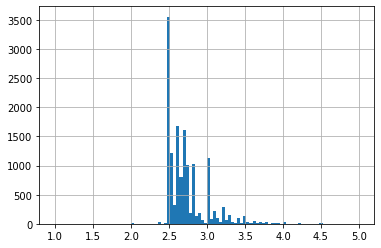

In [10]:
import matplotlib.pyplot as plt
data['ceiling_height'].hist(bins=100, range=(1,5))

Создадим переменную, удалив значения ниже 2,3м и выше 5м (в старых домах бывает такое,но вряд ли выше). Из-за большого разброса замена пропущенных на медианное значение может привести к искажению результатов.

In [16]:
def ceiling_height_correct(ceiling_height):
    if 2.3 <= ceiling_height <= 5.0:
        return ceiling_height
    elif ceiling_height > 5 or ceiling_height < 2.3:
        return 
data['ceiling_height_correct'] = data['ceiling_height'].apply(ceiling_height_correct)
print(data['ceiling_height_correct'].describe())

count    14452.000000
mean         2.726060
std          0.271125
min          2.300000
25%          2.520000
50%          2.650000
75%          2.800000
max          5.000000
Name: ceiling_height_correct, dtype: float64


In [17]:
print(data['floors_total'].value_counts(dropna=False)) # смотрим на переменную с общим количеством этажей

5.0     5788
9.0     3761
16.0    1376
12.0    1362
4.0     1200
10.0    1174
25.0    1075
6.0      914
17.0     833
3.0      668
7.0      592
14.0     553
18.0     505
24.0     469
8.0      390
2.0      383
15.0     365
23.0     352
19.0     339
22.0     286
20.0     271
13.0     229
11.0     203
27.0     164
21.0     158
26.0     124
NaN       86
1.0       25
35.0      24
28.0      21
36.0       3
29.0       1
60.0       1
33.0       1
52.0       1
37.0       1
34.0       1
Name: floors_total, dtype: int64


Проверим, нет ли каких-то особенностей в объектах с пропущенной этажностью, или это действительно просто пропуски?

In [18]:
print(data[data['floors_total'].isnull()])

      building_series_id  total_images  last_price  total_area  \
186                  NaN            12    11640000       65.20   
237                  NaN             4     2438033       28.10   
457                  NaN             4     9788348       70.80   
671                  NaN             4     6051191       93.60   
1757                 NaN             5     3600000       39.00   
1930                 NaN             1     9750000       66.77   
2392                 NaN             7     5395770       53.00   
2846                 NaN             4     2325000       27.80   
2952                 NaN            10     6500000       54.30   
3031                 NaN             9     6400000       56.70   
3438                 NaN            10     4100000       38.00   
3817                 NaN             1     1640000       23.98   
3831                 NaN             5     4850000       37.40   
4140                 NaN             4    10296437      100.30   
4617      

Видимо, это просто пропуски. При перекодировке в новый столбец с группированной этажностью обозначим эти объекты как "Неизвестно"

Еще важный момент относительно этажности, который стоит проверить.  
Нет ли в данных квартир с номером этажа больше, чем общее количество этажей в доме?

In [19]:
print(data.query('floors_total < floor').info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 29 columns):
building_series_id        0 non-null object
total_images              0 non-null int64
last_price                0 non-null int64
total_area                0 non-null float64
first_day_exposition      0 non-null datetime64[ns]
rooms                     0 non-null int64
ceiling_height            0 non-null float64
floors_total              0 non-null float64
living_area               0 non-null float64
floor                     0 non-null int64
is_apartment              0 non-null object
studio                    0 non-null bool
area                      0 non-null float64
open_plan                 0 non-null bool
kitchen_area              0 non-null float64
balcony                   0 non-null float64
locality_name             0 non-null object
airports_nearest          0 non-null float64
cityCenters_nearest       0 non-null float64
parks_around3000          0 non-null float64
parks_nearest    

Срез оказался пустым, перейдем к созданию столбца с кодами "Первый/Последний/Другой/Неизвестно".  
Но для начала надо решить, что делать с одноэтажными домами ) Посмотрим на срез данных с такой информацией.

In [20]:
print(data.query('floors_total ==1'))

      building_series_id  total_images  last_price  total_area  \
3076                 NaN            20     2000000        80.0   
4379                 NaN             5     5300000        58.5   
5300                 NaN             5     2990000        60.0   
5698                 NaN             7      450000        42.0   
5787                 NaN            16     9000000        88.0   
7962                 NaN             4      550000        46.2   
8335                 NaN            10     2700000        80.0   
8388                 NaN            20     3550000        48.2   
9517                 NaN             4     1200000        39.4   
9752                 NaN            16      850000        62.0   
10817                NaN             6      790000        50.6   
11641          1564812.0             6     3685000        44.7   
11746                NaN            10     1070000        38.8   
14836                NaN             3     3900000        45.0   
15543     

Особенно подозрительными эти данные не выглядят... Что ж, закодируем их как первый этаж.

In [21]:
def floor_grouped(row):
    floors_total = row['floors_total']
    floor = row['floor']    
    if floor == 1:
        return 'Первый'
    elif floor == floors_total and floors_total > 1:
        return 'Последний'
    elif floor > 1 and floor < floors_total:
        return 'Другой'
    else:
        return 'Неизвестно'
data['floor_grouped'] = data.apply(floor_grouped, axis=1)
print(data.loc[:, ['floor', 'floors_total', 'floor_grouped']].head(15))
print(data['floor_grouped'].value_counts(dropna=False))

    floor  floors_total floor_grouped
0       8          16.0        Другой
1       1          11.0        Первый
2       4           5.0        Другой
3       9          14.0        Другой
4      13          14.0        Другой
5       5          12.0        Другой
6       6          26.0        Другой
7      22          24.0        Другой
8      26          27.0        Другой
9       7           9.0        Другой
10      3          12.0        Другой
11      4           5.0        Другой
12      5           5.0     Последний
13      5           5.0     Последний
14      1           6.0        Первый
Другой        17363
Последний      3336
Первый         2917
Неизвестно       83
Name: floor_grouped, dtype: int64


Похоже, все закодировано верно.  
Следующий важный столбец - living_area. Здесь смущают пропущенные значения. Возможно, это студии?

In [22]:
print(data[data['living_area'].isnull()]['studio'].value_counts())

False    1893
True       10
Name: studio, dtype: int64


Гипотеза не потвердилась.  
Проверим, что с информацией по площади кухонь для этих квартир.

In [23]:
print(data[data['living_area'].isnull()]['kitchen_area'].value_counts(dropna=False))

NaN      1464
6.00       25
10.00      22
9.00       20
12.00      18
14.00      14
7.00       13
8.00       12
15.00      10
20.00       5
5.00        5
11.00       5
7.50        5
18.00       5
9.50        4
10.30       4
13.00       4
8.70        4
8.50        4
9.80        4
6.50        4
11.20       3
10.70       3
7.80        3
10.60       3
8.10        3
9.90        3
7.40        3
12.40       3
5.80        3
         ... 
10.80       1
18.30       1
10.40       1
12.14       1
14.61       1
10.94       1
14.43       1
13.53       1
11.63       1
9.97        1
12.35       1
11.67       1
11.55       1
17.70       1
6.70        1
9.27        1
10.15       1
11.12       1
5.90        1
11.28       1
9.24        1
11.71       1
10.29       1
11.10       1
42.50       1
7.48        1
23.25       1
13.64       1
23.20       1
16.48       1
Name: kitchen_area, Length: 216, dtype: int64


Для многих объектов также отсутствует информация о площади кухонь, но все же не для всех.  
Есть искушение удалить объекты с отсутствующей информацией о жилой площади, но все же их достаточно много.  
Лучше оставить, но придется применить достаточно сложную логику, чтобы избежать странных значений.  
Некорректно заполнять пропуски в данном столбце, основываясь только на данных столбца (среднее или медиана).  
Необходимо учитывать также значения, указанные в столбцах total_area и kitchen_area (сумма жилой площади и площади кухни не может превышать общую площадь).  
Предлагается следующий алгоритм замены пропущенных значений:
- если неизвестны оба параметра (площадь кухни и жилая площадь), то пропущенные значения заменяем на общую площадь, умноженную на медианную долю кухни и жилой площади в общей площади;
- если неизвестна только площадь кухни, то пропущенные значения заменяем на общую площадь за вычетом жилой площади, умноженную на медианную долю площади кухни в общей площади после вычета жилой площади;
- если неизвестна только жилая площадь, пропущенные значения жилой площади заменяем на общую площадь за вычетом площади кухни, умноженную на медианную долю жилой площади в общей площади после вычета площади кухни

Перед началом анализа посмотрим, есть ли объекты, для которых некорректно введены параметры площади (сумма площади кухни и жилой больше или равны общей).

In [24]:
print(data.query('(living_area + kitchen_area) > total_area').info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 64 entries, 184 to 23202
Data columns (total 30 columns):
building_series_id        10 non-null object
total_images              64 non-null int64
last_price                64 non-null int64
total_area                64 non-null float64
first_day_exposition      64 non-null datetime64[ns]
rooms                     64 non-null int64
ceiling_height            42 non-null float64
floors_total              64 non-null float64
living_area               64 non-null float64
floor                     64 non-null int64
is_apartment              17 non-null object
studio                    64 non-null bool
area                      64 non-null float64
open_plan                 64 non-null bool
kitchen_area              64 non-null float64
balcony                   44 non-null float64
locality_name             64 non-null object
airports_nearest          44 non-null float64
cityCenters_nearest       44 non-null float64
parks_around3000          44

Таких 64 объекта. Будем иметь их в виду при подсчете медианных значений для замены пропущенных, а также заменим для этих объектов значения жилой площади и площади кухни на медианные.  
Создадим логический столбец для легкого выявления этих объектов.

In [25]:
def incorrect_area(row):
    living_area = row['living_area']
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    if (living_area + kitchen_area) > total_area:
        return True
    else:
        return False
data['incorrect_area'] = data.apply(incorrect_area, axis=1)
print(data['incorrect_area'].value_counts())

False    23635
True        64
Name: incorrect_area, dtype: int64


Создадим функции, которые нам позволят создать столбцы с долями, избежав некорректных значений.

In [26]:
def living_area_share(row):
    living_area = row['living_area']
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    if (living_area + kitchen_area) > total_area:
        return
    else:
        return living_area / total_area 
data['living_area_share'] = data.apply(living_area_share, axis=1)
def kitchen_area_share(row):
    living_area = row['living_area']
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    if (living_area + kitchen_area) > total_area:
        return
    else:
        return kitchen_area / total_area 
data['kitchen_area_share'] = data.apply(kitchen_area_share, axis=1)
def living_area_nokitchen_share(row):
    living_area = row['living_area']
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    if (living_area + kitchen_area) > total_area:
        return
    elif kitchen_area == total_area:
        return 0
    else:
        return living_area / (total_area - kitchen_area)
data['living_area_nokitchen_share'] = data.apply(living_area_nokitchen_share, axis=1)
def kitchen_area_noliving_share(row):
    living_area = row['living_area']
    kitchen_area = row['kitchen_area']
    total_area = row['total_area']
    if (living_area + kitchen_area) > total_area:
        return
    elif living_area == total_area:
        return 0
    else:
        return kitchen_area / (total_area - living_area)
data['kitchen_area_noliving_share'] = data.apply(kitchen_area_noliving_share, axis=1)

In [27]:
print(data.loc[:, ['living_area', 'kitchen_area', 'total_area', 'living_area_share', 'kitchen_area_share', 'living_area_nokitchen_share', 'kitchen_area_noliving_share']].head(15))

    living_area  kitchen_area  total_area  living_area_share  \
0         51.00         25.00      108.00           0.472222   
1         18.60         11.00       40.40           0.460396   
2         34.30          8.30       56.00           0.612500   
3           NaN           NaN      159.00                NaN   
4         32.00         41.00      100.00           0.320000   
5         14.40          9.10       30.40           0.473684   
6         10.60         14.40       37.30           0.284182   
7           NaN         18.90       71.60                NaN   
8         15.43          8.81       33.16           0.465320   
9         43.60          6.50       61.00           0.714754   
10        20.30          8.50       39.60           0.512626   
11        31.00          6.00       44.00           0.704545   
12        30.00          9.00       54.00           0.555556   
13        27.00          5.20       42.80           0.630841   
14        17.00          8.00       36.0

Новые столбцы считаются верно. Проверим, нет ли странных долей (больше 1 или меньше 0). А также нет ли случаев, когда сумма долей площади кухни и жилой площади превышает 1. 

In [28]:
print(data['living_area_share'].describe())
print(data['kitchen_area_share'].describe())
print(data['living_area_nokitchen_share'].describe())
print(data['kitchen_area_noliving_share'].describe())
print((data['living_area_share']+data['kitchen_area_share']).describe())

count    21732.000000
mean         0.563967
std          0.104341
min          0.021583
25%          0.494969
50%          0.567442
75%          0.637188
max          1.000000
Name: living_area_share, dtype: float64
count    21357.000000
mean         0.186988
std          0.072254
min          0.025381
25%          0.133333
50%          0.172131
75%          0.231579
max          0.724638
Name: kitchen_area_share, dtype: float64
count    20918.000000
mean         0.687430
std          0.091130
min          0.024390
25%          0.634615
50%          0.689655
75%          0.742857
max          1.000000
Name: living_area_nokitchen_share, dtype: float64
count    20920.000000
mean         0.422055
std          0.108916
min          0.000000
25%          0.352941
50%          0.411089
75%          0.477836
max          1.000000
Name: kitchen_area_noliving_share, dtype: float64
count    20918.000000
mean         0.748283
std          0.068136
min          0.136691
25%          0.710641
50%  

Создадим переменные с медианными значениями нужных нам долей, и заменим пропуски. В принципе, в данном случае распределения близки к нормальным, и можно было бы использовать и среднее.

In [29]:
living_area_share_median = data['living_area_share'].median()
kitchen_area_share_median = data['kitchen_area_share'].median()
living_area_nokitchen_share_median = data['living_area_nokitchen_share'].median()
kitchen_area_noliving_share_median = data['kitchen_area_noliving_share'].median()
print(living_area_share_median, kitchen_area_share_median, living_area_nokitchen_share_median, kitchen_area_noliving_share_median)

0.5674418604651164 0.17213114754098363 0.6896551724137931 0.41108915239350025


Создадим функцию, которая создаст переменную с корректной жилой площадью в соответствии с нашим алгоритмом.

In [30]:
def living_area_correct(row):
    total_area = row['total_area']
    living_area = row['living_area']
    living_area_share = row['living_area_share']
    kitchen_area_share = row['kitchen_area_share']
    kitchen_area = row['kitchen_area']
    if pd.isnull(living_area_share) == False:
        return living_area
    elif pd.isnull(living_area_share) == True and pd.isnull(kitchen_area_share) == True:
        return living_area_share_median * total_area
    elif pd.isnull(living_area_share) == True and pd.isnull(kitchen_area_share) == False:
        return living_area_nokitchen_share_median * (total_area - kitchen_area)
data['living_area_correct'] = data.apply(living_area_correct, axis=1)
print(data.info())
print(data.loc[:, ['living_area_nokitchen_share', 'living_area', 'total_area', 'living_area_share', 'kitchen_area_share', 'living_area_correct']].head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 36 columns):
building_series_id             6517 non-null object
total_images                   23699 non-null int64
last_price                     23699 non-null int64
total_area                     23699 non-null float64
first_day_exposition           23699 non-null datetime64[ns]
rooms                          23699 non-null int64
ceiling_height                 14504 non-null float64
floors_total                   23613 non-null float64
living_area                    21796 non-null float64
floor                          23699 non-null int64
is_apartment                   2775 non-null object
studio                         23699 non-null bool
area                           23699 non-null float64
open_plan                      23699 non-null bool
kitchen_area                   21421 non-null float64
balcony                        12180 non-null float64
locality_name                  23650 n

Сделаем тоже самое для площади кухни.

In [31]:
def kitchen_area_correct(row):
    total_area = row['total_area']
    living_area = row['living_area']
    living_area_share = row['living_area_share']
    kitchen_area_share = row['kitchen_area_share']
    kitchen_area = row['kitchen_area']
    if pd.isnull(kitchen_area_share) == False:
        return kitchen_area
    elif pd.isnull(living_area_share) == True and pd.isnull(kitchen_area_share) == True:
        return kitchen_area_share_median * total_area
    elif pd.isnull(kitchen_area_share) == True and pd.isnull(living_area_share) == False:
        return kitchen_area_noliving_share_median * (total_area - living_area)
data['kitchen_area_correct'] = data.apply(kitchen_area_correct, axis=1)
print(data.info())
print(data.loc[:, ['kitchen_area', 'total_area', 'living_area_share', 'kitchen_area_share', 'kitchen_area_correct']].head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 37 columns):
building_series_id             6517 non-null object
total_images                   23699 non-null int64
last_price                     23699 non-null int64
total_area                     23699 non-null float64
first_day_exposition           23699 non-null datetime64[ns]
rooms                          23699 non-null int64
ceiling_height                 14504 non-null float64
floors_total                   23613 non-null float64
living_area                    21796 non-null float64
floor                          23699 non-null int64
is_apartment                   2775 non-null object
studio                         23699 non-null bool
area                           23699 non-null float64
open_plan                      23699 non-null bool
kitchen_area                   21421 non-null float64
balcony                        12180 non-null float64
locality_name                  23650 n

Теперь пересчитаем долю жилой площади в общей и кухни в общей.

In [32]:
data['living_area_share'] = data['living_area_correct'] / data['total_area']
data['kitchen_area_share'] = data['kitchen_area_correct'] / data['total_area']
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 37 columns):
building_series_id             6517 non-null object
total_images                   23699 non-null int64
last_price                     23699 non-null int64
total_area                     23699 non-null float64
first_day_exposition           23699 non-null datetime64[ns]
rooms                          23699 non-null int64
ceiling_height                 14504 non-null float64
floors_total                   23613 non-null float64
living_area                    21796 non-null float64
floor                          23699 non-null int64
is_apartment                   2775 non-null object
studio                         23699 non-null bool
area                           23699 non-null float64
open_plan                      23699 non-null bool
kitchen_area                   21421 non-null float64
balcony                        12180 non-null float64
locality_name                  23650 n

Проверим, нет ли случаев, когда сумма долей жилой площади и кухни превышает 1

In [33]:
print((data['living_area_share'] + data['kitchen_area_share']).max())

1.0


Это тоже странное значение, но по крайней мере не совершенно алогичное )

Продолжим анализ переменных. Что у нас в is_apartment?

In [34]:
print(data['is_apartment'].value_counts(dropna=False))

NaN      20924
False     2725
True        50
Name: is_apartment, dtype: int64


Апартаменты - вообще вещь редкая на рынке. По всей видимости, отсутствующие значения - это False.

In [35]:
data['is_apartment'] = data['is_apartment'].fillna(False)
print(data['is_apartment'].value_counts(dropna=False))

False    23649
True        50
Name: is_apartment, dtype: int64


In [36]:
print(data['studio'].value_counts()) # проверяем переменную studio

False    23550
True       149
Name: studio, dtype: int64


In [37]:
print(data['open_plan'].value_counts()) # проверяем переменную open_plan

False    23632
True        67
Name: open_plan, dtype: int64


In [38]:
print(data['balcony'].value_counts(dropna=False)) # проверяем переменную open_plan

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64


Многовато пропущенных значений для однозначного понимания, можно ли заменить пропущенные значения на ноль...  
Пока оставим эту переменную, видимо, возможности ее использования при анализе влияния на цену ограничены.

In [39]:
print(data['locality_name'].value_counts(dropna=False))

Санкт-Петербург                                            15721
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 178
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

Заменим пропущенное значение на "Не указан"

In [40]:
data['locality_name'] = data['locality_name'].fillna('Не указан')
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 37 columns):
building_series_id             6517 non-null object
total_images                   23699 non-null int64
last_price                     23699 non-null int64
total_area                     23699 non-null float64
first_day_exposition           23699 non-null datetime64[ns]
rooms                          23699 non-null int64
ceiling_height                 14504 non-null float64
floors_total                   23613 non-null float64
living_area                    21796 non-null float64
floor                          23699 non-null int64
is_apartment                   23699 non-null bool
studio                         23699 non-null bool
area                           23699 non-null float64
open_plan                      23699 non-null bool
kitchen_area                   21421 non-null float64
balcony                        12180 non-null float64
locality_name                  23699 no

In [41]:
print(data['airports_nearest'].describe())

count    18157.000000
mean     28793.672193
std      12630.880622
min          0.000000
25%      18585.000000
50%      26726.000000
75%      37273.000000
max      84869.000000
Name: airports_nearest, dtype: float64


Совершенно непонятно, как заполнять пропущенные в данном случае. 0 - также сомнительное значение

In [42]:
print(data[data['airports_nearest'].isnull()]['locality_name'].value_counts(dropna=False))

посёлок Мурино                   522
Всеволожск                       398
Гатчина                          307
деревня Кудрово                  299
Выборг                           237
Кудрово                          173
деревня Новое Девяткино          144
Сертолово                        142
Кириши                           125
Сланцы                           112
Волхов                           111
Тосно                            104
Кингисепп                        104
Никольское                        93
Коммунар                          89
Сосновый Бор                      87
Санкт-Петербург                   85
Кировск                           84
Отрадное                          80
посёлок Бугры                     69
Приозерск                         66
деревня Старая                    64
городской посёлок Янино-1         61
Шлиссельбург                      57
Луга                              56
Тихвин                            49
поселок Бугры                     45
п

Интересно, что значения пропущены преимущественно для населенных пунктов в Ленинградской области. Но в любом случае посчитать значения для каждого пункта нереально.

In [43]:
print(data.query('airports_nearest == 0')['airports_nearest'].count())

1


Объект, для которого расстояние до аэропорта "0", только один, поэтому существенных помех в данные он не вносит.  
Попробуем в дальнейшем проанализировать взаимосвязь со стоимостью квартир на имеющейся выборке.

In [44]:
data['days_exposition'].describe() # проверим переменную days_exposition

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

Может быть, пропущенные значения - это еще актуальные объявления?

In [45]:
data[data['days_exposition'].isnull()].groupby('exposition_year')['exposition_year'].count()

exposition_year
2014      18
2015      70
2016      67
2017     271
2018     959
2019    1796
Name: exposition_year, dtype: int64

Однозначного ответа результаты не дают, и все же более половины объявлений были опубликованы в этом году.  
Можно было бы посчитать длительность экспозиции до сегодняшнего дня, но это не очень корректно, так как нам нужно будет оценивать среднюю продолжительность продажи объекта.

Продолжим анализ переменных. Важным параметром является расстояние до центра.

In [46]:
data['cityCenters_nearest'].describe()

count    18180.000000
mean     14191.277833
std       8608.386210
min        181.000000
25%       9238.000000
50%      13098.500000
75%      16293.000000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

Пропущенных много, и у нас нет данных, чтобы их корректно заполнить. Попробуем хотя бы посмотреть, для каких населенных пунктов нет информации.

In [47]:
print(data[data['cityCenters_nearest'].isnull()]['locality_name'].value_counts(dropna=False))

посёлок Мурино                                522
Всеволожск                                    398
Гатчина                                       307
деревня Кудрово                               299
Выборг                                        237
Кудрово                                       173
деревня Новое Девяткино                       144
Сертолово                                     142
Кириши                                        125
Сланцы                                        112
Волхов                                        111
Тосно                                         104
Кингисепп                                     104
Никольское                                     93
Коммунар                                       89
Сосновый Бор                                   87
Кировск                                        84
Отрадное                                       80
посёлок Бугры                                  69
Приозерск                                      66


Вылез схожий список, как и для расстояния до аэропорта.  
Вместе с тем, мы можем анализировать выборку с имеющимися значениями, так как они выглядят разумно.

In [48]:
print(data['parks_around3000'].value_counts(dropna=False)) # проверим переменную parks_around3000

0.0    10106
1.0     5681
NaN     5518
2.0     1747
3.0      647
Name: parks_around3000, dtype: int64


Заполнить пропуски также не получится, но попробуем посмотреть на данные по имеющейся выборке. Также взглянем на всякий случай, что это за пункты.

In [49]:
print(data[data['parks_around3000'].isnull()]['locality_name'].value_counts(dropna=False))

посёлок Мурино                   522
Всеволожск                       398
Гатчина                          307
деревня Кудрово                  299
Выборг                           237
Кудрово                          173
деревня Новое Девяткино          144
Сертолово                        142
Кириши                           125
Сланцы                           112
Волхов                           111
Тосно                            104
Кингисепп                        104
Никольское                        93
Коммунар                          89
Сосновый Бор                      87
Кировск                           84
Отрадное                          80
посёлок Бугры                     69
Приозерск                         66
деревня Старая                    64
Санкт-Петербург                   61
городской посёлок Янино-1         61
Шлиссельбург                      57
Луга                              56
Тихвин                            49
поселок Бугры                     45
п

Опять тот же список - видимо, без данных по геолокации.

In [50]:
data['parks_nearest'].describe()

count    8079.000000
mean      490.804555
std       342.317995
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

Заметных различий по расстоянию до парка (если он есть поблизости) нет: 25% процентиль отличается от 75% всего на 300 метров. В анализе будем смотреть на наличие и количество парков.

In [51]:
print(data['ponds_around3000'].value_counts(dropna=False)) # проверим переменную ponds_around3000

0.0    9071
1.0    5717
NaN    5518
2.0    1892
3.0    1501
Name: ponds_around3000, dtype: int64


In [52]:
data['ponds_nearest'].describe()

count    9110.000000
mean      517.980900
std       277.720643
min        13.000000
25%       294.000000
50%       502.000000
75%       729.000000
max      1344.000000
Name: ponds_nearest, dtype: float64

Здесь поступим по той же логике, что и с данными по наличию парка и расстоянию до него. Проанализируем зависимость цены от наличия пруда и их количества.

## 2. Исследовательский анализ данных

### Типичные параметры квартир и выявление отклонений

Посмотрим на общую информацию о цене на квартиры.

In [53]:
data['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

Средняя цена квартиры около 6,5 млн рублей, медианная - 4,6 млн.  
Минимальная цена в районе 12 тысяч рублей, а максимальная - 763 миллиона.  
И то, и другое выглядит аномалией. 
Посмотрим на гистограмму распределения цен.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f69dc668>]],
      dtype=object)

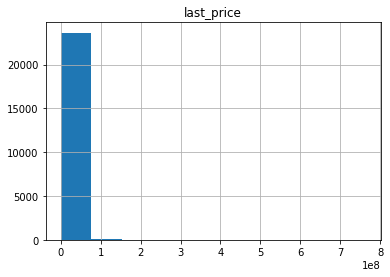

In [54]:
data.hist('last_price')

Так ничего непонятно. Разделим на большее количество корзин и ограничим значения 30 млн. рублей

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f69dcb70>]],
      dtype=object)

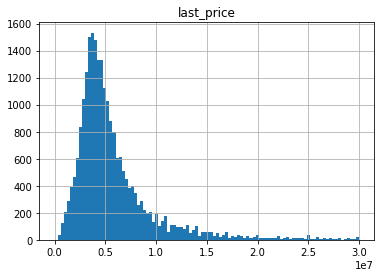

In [55]:
data.hist('last_price', bins=100, range=(0,30000000))

В принципе, распределение похоже на нормальное.  
Но исключать объекты из базы нужно на основе другой величины - цены за квадратный метр, так как цены могут сильно варьироваться в зависимости от площади.

In [56]:
print(data['price_per_sqm'].min())
print(data['price_per_sqm'].max())

111
1907500


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f631eeb8>]],
      dtype=object)

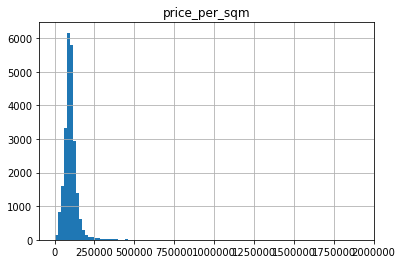

In [57]:
data.hist('price_per_sqm', bins=100)

Попробуем посмотреть на "ящик с усами", чтобы выявить приемлемый диапазон стоимости за квадратный метр.

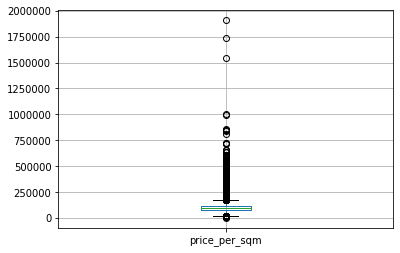

In [58]:
data.boxplot('price_per_sqm')

Посмотрим внимательнее на диапазон, в который попадают усы.

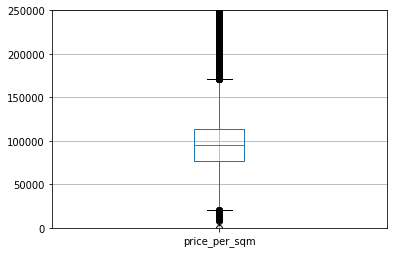

In [59]:
plt.ylim(0, 250000)
data.boxplot('price_per_sqm')

Усы попадают в диапазон от 20 тысяч до 160 тысяч рублей за квадратный метр. Несколько расширим диапазон, так как рынок жилья весьма сегментирован.
Попробуем ограничить верхний предел величиной 300 тыс. рублей

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f3ee3780>]],
      dtype=object)

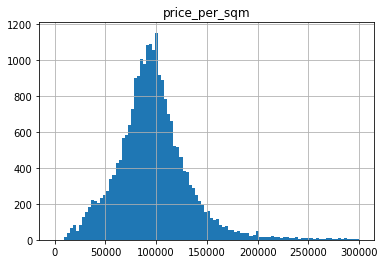

In [60]:
data.hist('price_per_sqm', bins=100, range=(0,300000))

При дальнейшем анализе, по всей видимости, можно будет обрезать объекты стоимостью выше 300000 тыс. рублей. Посмотрим, сколько мы потеряем.

In [61]:
print(data.query('price_per_sqm > 300000')['price_per_sqm'].count())

172


Приемлемая величина. На самом деле, вопросы вызывают и объекты со стоимостью за квадратный метр ниже 30 тыс. рублей. Это мало, а таких объектов явно много. Проверим.

In [62]:
print(data.query('price_per_sqm < 30000')['price_per_sqm'].count())

466


Проверим, где находятся эти объекты.

In [63]:
print(data.query('price_per_sqm < 30000').groupby('locality_name')['locality_name'].count().sort_values(ascending=False))

locality_name
Сланцы                                   111
Пикалёво                                  18
Бокситогорск                              16
Волхов                                    16
Подпорожье                                13
Лодейное Поле                             12
посёлок городского типа Кузнечное         12
Ивангород                                 12
Луга                                       9
Санкт-Петербург                            8
Каменногорск                               8
поселок городского типа Никольский         7
городской посёлок Назия                    7
Выборг                                     6
поселок Елизаветино                        6
посёлок городского типа Важины             6
посёлок городского типа Сиверский          6
деревня Извара                             5
деревня Батово                             5
деревня Белогорка                          4
Кириши                                     4
Гатчина                                  

Что же, в поселках Ленинградской области такие цены реальны. Посмотрим на распределение в малых значениях цены за квадратный метр, наверняка отыщется значение отсечения.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f3dc3860>]],
      dtype=object)

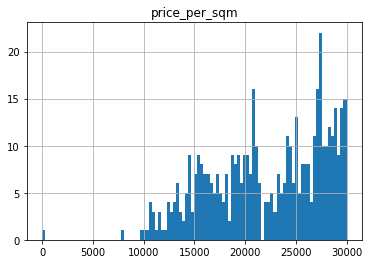

In [64]:
data.hist('price_per_sqm', bins=100, range=(0,30000))

Меньше 10000 рублей - точно ошибка

Посмотрим на типичные значения общей площади.

In [65]:
data['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f3d1fe80>]],
      dtype=object)

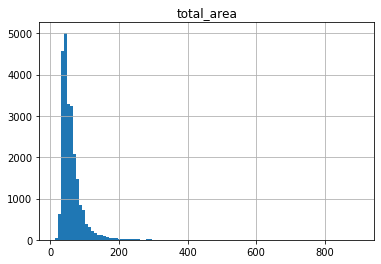

In [66]:
data.hist('total_area', bins=100)

Хвост очень длинный! Посмотрим внимательнее на основной массив, до 150 метров.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f3de3780>]],
      dtype=object)

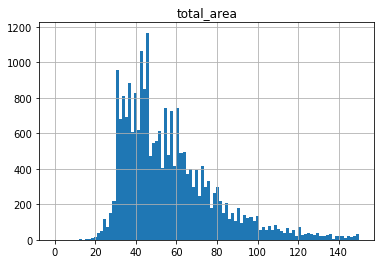

In [67]:
data.hist('total_area', bins=100, range=(0,150))

Распределение ближе к распределению Пуассона. В принципе, при анализе факторов, влияющих на цену, вполне можно исключить квартиры слишком большой площади.  
Посмотрим, сколько квартир более 250 квадратных метров.

In [68]:
print(data.query('total_area > 250')['total_area'].count())

112


Вполне можно убрать.
Посмотрим еще на диапазон стоимости квартир в зависимости от количества комнат.

In [69]:
print(data.pivot_table(index='rooms', values='last_price', aggfunc=['count', 'min', 'max', 'median']))

           count        min        max     median
      last_price last_price last_price last_price
rooms                                            
0            197     945750   71000000    2700000
1           8047     430000   43511000    3600000
2           7940      12190  289238400    4770169
3           5814     550000  330000000    6200000
4           1180     999000  159984000    9000000
5            326    1650000  401300000   14000000
6            105    4390000  245000000   19000000
7             59    7900000  763000000   24900000
8             12   15800000  180000000   23095000
9              8   17000000   88000000   23750000
10             3   15500000   40000000   23000000
11             2   17500000   33000000   25250000
12             1  420000000  420000000  420000000
14             2   25000000   28659000   26829500
15             1   65000000   65000000   65000000
16             1   28500000   28500000   28500000
19             1   32250000   32250000   32250000


Медианные цены возрастают. Для дальнейшего анализа вполне можно было бы объединить квартиры с 5 и более комнатами в один сегмент. Неоднородной выглядит группа без комнат - ведь там и студии, и квартиры с открытой планировкой.  
Создадим новую переменную с группировкой по количеству комнат.

In [70]:
def rooms_grouped(row):
    rooms = row['rooms']
    studio = row['studio']
    open_plan = row['open_plan']
    if studio == True:
        return 'Студия'
    if open_plan == True:
        return 'Открытая планировка'
    if rooms == 1:
        return '1-комнатная'
    if rooms == 2:
        return '2-комнатная'
    if rooms == 3:
        return '3-комнатная'
    if rooms == 4:
        return '4-комнатная'
    if rooms > 4:
        return '5 комнат и больше'
data['rooms_grouped'] = data.apply(rooms_grouped, axis=1)
print(data['rooms_grouped'].value_counts())

1-комнатная            8033
2-комнатная            7939
3-комнатная            5812
4-комнатная            1179
5 комнат и больше       520
Студия                  149
Открытая планировка      67
Name: rooms_grouped, dtype: int64


Теперь посмотрим на цену на квадратный метр по этим группам.

In [71]:
print(data.pivot_table(index='rooms_grouped', values='price_per_sqm', aggfunc=['count', 'min', 'max', 'median']))

                            count           min           max        median
                    price_per_sqm price_per_sqm price_per_sqm price_per_sqm
rooms_grouped                                                              
1-комнатная                  8033         11000        848484      100000.0
2-комнатная                  7939           111       1542604       92807.0
3-комнатная                  5812         10507       1736842       88985.0
4-комнатная                  1179         13483        995983       92666.0
5 комнат и больше             520         14347       1907500       99593.5
Открытая планировка            67         48133        310592      102222.0
Студия                        149         34375        231960      105555.0


Уберем экстремальные значения стоимости за квадратный метр (менее 30000 и более 300000) и сохраним переменную со статистикой по количеству комнат.

In [72]:
rooms_stat = (
    data.query('10000 <= price_per_sqm <= 300000')
    .pivot_table(index='rooms_grouped', values='price_per_sqm', aggfunc=['count', 'min', 'max', 'median'])
)
print(rooms_stat)

                            count           min           max        median
                    price_per_sqm price_per_sqm price_per_sqm price_per_sqm
rooms_grouped                                                              
1-комнатная                  8021         11000        292307        100000
2-комнатная                  7905         10185        299000         92666
3-комнатная                  5753         10507        300000         88732
4-комнатная                  1141         13483        300000         91626
5 комнат и больше             489         14347        300000         96551
Открытая планировка            66         48133        191374        101111
Студия                        149         34375        231960        105555


Интересно, что площадь за квадратный метр ниже для 2-5 комнатных квартир, чем для студий и однокомнатных. Но отличия между квартирами с различным количеством комнат не очень велики.

Посмотрим на зависимость стоимости квадратного метра от общей площади квартиры.

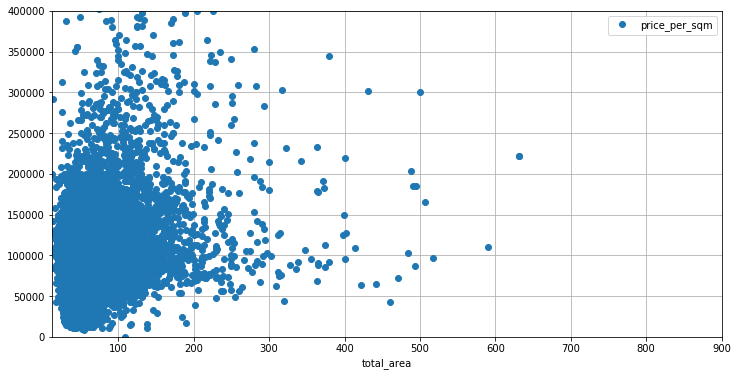

In [73]:
data.plot(x='total_area', y='price_per_sqm', style='o', ylim=(0, 400000), grid=True, figsize=(12, 6))

Видно, что явной зависимости не выявляется. Кроме того,очевидно, что основной массив объектов ограничен, с одной стороны, площадью квартир в 200 квадратных метров, а с другой - стоимостью в 200 тысяч рублей за квадратный метр.  
Несколько расширим диапазон, чтобы не потерять слишком много объектов - 300 тысяч и 250 квадратных метров. Кроме того, уберем сомнительные объявления с ценой менее 10 тысяч рублей за квадратный метр.  
Сделаем выборку этих объектов и посчитаем для них корреляцию цены за квадратный метр с основными численными параметрами (общая площадь, жилая площадь, площадь кухни, доля жилой площади, доля кухни, высота потолков, удаленность до центра города, длительность экспозиции объявления, расстояние до аэропорта).

### Влияние факторов на цену за квадратный метр

In [74]:
sample = data.query('10000 <= price_per_sqm <= 300000 and total_area <= 250')
print("Корреляция цены за квадратный метр и общей площади: {:.2f}".format(sample['price_per_sqm'].corr(sample['total_area'])))
print("Корреляция цены за квадратный метр и жилой площади: {:.2f}".format(sample['price_per_sqm'].corr(sample['living_area'])))
print("Корреляция цены за квадратный метр и площади кухни: {:.2f}".format(sample['price_per_sqm'].corr(sample['kitchen_area'])))
print("Корреляция цены за квадратный метр и доли жилой площади: {:.2f}".format(sample['price_per_sqm'].corr(sample['living_area_share'])))
print("Корреляция цены за квадратный метр и доли площади кухни: {:.2f}".format(sample['price_per_sqm'].corr(sample['kitchen_area_share'])))
print("Корреляция цены за квадратный метр и высоты потолков: {:.2f}".format(sample['price_per_sqm'].corr(sample['ceiling_height_correct'])))
print("Корреляция цены за квадратный метр и удаленности от центра: {:.2f}".format(sample['price_per_sqm'].corr(sample['cityCenters_nearest'])))
print("Корреляция цены за квадратный метр и длительности экспозиции объявления: {:.2f}".format(sample['price_per_sqm'].corr(sample['days_exposition'])))
print("Корреляция цены за квадратный метр и расстояния до аэропорта: {:.2f}".format(sample['price_per_sqm'].corr(sample['airports_nearest'])))

Корреляция цены за квадратный метр и общей площади: 0.20
Корреляция цены за квадратный метр и жилой площади: 0.10
Корреляция цены за квадратный метр и площади кухни: 0.37
Корреляция цены за квадратный метр и доли жилой площади: -0.20
Корреляция цены за квадратный метр и доли площади кухни: 0.21
Корреляция цены за квадратный метр и высоты потолков: 0.35
Корреляция цены за квадратный метр и удаленности от центра: -0.40
Корреляция цены за квадратный метр и длительности экспозиции объявления: 0.04
Корреляция цены за квадратный метр и расстояния до аэропорта: -0.04


Результаты весьма любопытны. Стоимость за квадратный метр крайне сильно зависит от:
    - удаленности от центра, причем связь отрицательная: чем дальше от центра, тем дешевле метр;
    - площади кухни: здесь отразилась, очевидно, тенденция в новых домах, особенно комфорт и элит класса, делать большие кухни-гостиные;
    - положительно от доли площади кухни и отрицательно от доли жилой площади, что опять же объясняется популярностью больших кухонь;
    - есть положительная связь и с общей площадью, по всей видимости, за счет дороговизны элитных квартир.
Практически нет зависимости между ценой за квадратный метр и расстоянием до аэропорта, высотой потолков, длительностью экспозиции объявления, жилой площадью.

Посмотрим на взаимосвязь цены на квадратный метр с другими имеющимися данными.

In [75]:
print(sample.pivot_table(index='floor_grouped', values='price_per_sqm', aggfunc=['count', 'min', 'max', 'median']))

                      count           min           max        median
              price_per_sqm price_per_sqm price_per_sqm price_per_sqm
floor_grouped                                                        
Другой                17188         10368        300000         98000
Неизвестно               82         47041        198913        101603
Первый                 2896         10185        286666         81096
Последний              3270         10507        284545         87251


За первый и последний этажи однозначно просят меньше, особенно за первый!

In [76]:
print(sample.pivot_table(index='parks_around3000', values='price_per_sqm', aggfunc=['count', 'min', 'max', 'median']))

                         count           min           max        median
                 price_per_sqm price_per_sqm price_per_sqm price_per_sqm
parks_around3000                                                        
0.0                      10041         15345        300000       99488.0
1.0                       5618         16842        300000      104352.5
2.0                       1676         41911        295202      106168.0
3.0                        591         53349        297556      103787.0


Если парка нет в радиусе 3км - это плохо. Но количество парков уже не столь важно.

In [77]:
print(sample.pivot_table(index='ponds_around3000', values='price_per_sqm', aggfunc=['count', 'min', 'max', 'median']))

                         count           min           max        median
                 price_per_sqm price_per_sqm price_per_sqm price_per_sqm
ponds_around3000                                                        
0.0                       9016         15345        300000        100000
1.0                       5655         26250        293269        101428
2.0                       1845         15861        295202        103988
3.0                       1410         17391        300000        114009


Водоемы - это также отличный бонус. Наличие трех водоемов в радиусе 3км увеличивает цену за квадратный метр почти на 14% по сравнению с квартирами, для которых водоем поблизости отсутствует.

Посмотрим, как влияет дата размещения на стоимость за квадратный метр.

In [78]:
print(sample.pivot_table(index='exposition_weekday', values='price_per_sqm', aggfunc=['count', 'min', 'max', 'median']))

                           count           min           max        median
                   price_per_sqm price_per_sqm price_per_sqm price_per_sqm
exposition_weekday                                                        
0                           3578         10561        288311         94444
1                           4141         10769        300000         95371
2                           3930         10925        292307         95354
3                           4233         10185        297556         94807
4                           3960         10368        300000         94437
5                           1909         12542        288940         92948
6                           1685         11463        299000         94252


Явной зависимости от дня недели размещения не выявлено (0 - понедельник, 6 - вокресенье). Что, в общем, ожидаемо.

In [79]:
print(sample.pivot_table(index='exposition_month', values='price_per_sqm', aggfunc=['count', 'min', 'max', 'median']))

                         count           min           max        median
                 price_per_sqm price_per_sqm price_per_sqm price_per_sqm
exposition_month                                                        
1                         1480         12422        292207       95096.5
2                         2613         10185        297556       94805.0
3                         2562         12931        299000       95075.0
4                         2355         11250        286000       96000.0
5                         1262         10897        296610       92528.5
6                         1734         10925        295202       92440.0
7                         1672         10507        293269       94598.5
8                         1724         10368        266789       95538.5
9                         1959         12555        272097       95351.0
10                        2111         14264        300000       94102.0
11                        2349         10769       

Ниже всего стоимость квартир, выставленных в июне. Определенная логика в этом есть - лето, сезон отпусков, мертвое время для риэлторов. Но все же размах не очень велик.

In [80]:
print(sample.pivot_table(index='exposition_year', values='price_per_sqm', aggfunc=['count', 'min', 'max', 'median']))

                        count           min           max        median
                price_per_sqm price_per_sqm price_per_sqm price_per_sqm
exposition_year                                                        
2014                      131         20338        278099      106344.0
2015                     1160         12542        273096       92756.0
2016                     2745         11587        299000       91379.0
2017                     8096         10714        300000       92268.5
2018                     8458         10368        296610       95555.0
2019                     2846         10185        286666      103057.5


Самые дорогие квартиры - выставленные в 2014 году. Самая очевидная гипотеза - эти квартиры слишком дорогие, поэтому их никто не покупает.  
По высокой цене выставлены также "свежие" квартиры.

### Цена квадратного метра в пригородах

Проанализируем цены в пригородах, сравнив с Петербургом. Выберем top-10 пригородов.  
Для этого сохраним табличку с value_counts по столбцу locality_name.

In [81]:
locality_list = sample['locality_name'].value_counts()
print(locality_list)

Санкт-Петербург                                            15466
посёлок Мурино                                               522
посёлок Шушары                                               440
Всеволожск                                                   397
Пушкин                                                       367
Колпино                                                      337
посёлок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 177
Кудрово                                                      173
деревня Новое Девяткино                                      144
Сертолово                

In [82]:
locality_list = locality_list[:11] # отберем СПб и топ-10 пригородов
print(locality_list)

Санкт-Петербург      15466
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             397
Пушкин                 367
Колпино                337
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Петергоф               201
Name: locality_name, dtype: int64


In [83]:
suburbs_sample = sample.query('locality_name in @locality_list.index') # сделаем выборку из улучшенных данных
print(suburbs_sample['locality_name'].value_counts())

Санкт-Петербург      15466
посёлок Мурино         522
посёлок Шушары         440
Всеволожск             397
Пушкин                 367
Колпино                337
посёлок Парголово      327
Гатчина                307
деревня Кудрово        299
Выборг                 237
Петергоф               201
Name: locality_name, dtype: int64


In [84]:
suburbs_sample_stat = suburbs_sample.pivot_table(index='locality_name', values='price_per_sqm', aggfunc=['count', 'min', 'max', 'median'])
suburbs_sample_stat.columns = ['count', 'min', 'max', 'median']
print(suburbs_sample_stat.sort_values(by='median', ascending=False))

                   count    min     max  median
locality_name                                  
Санкт-Петербург    15466  15345  300000  104411
Пушкин               367  59836  256521  100000
деревня Кудрово      299  54160  142857   91860
посёлок Парголово    327  39205  138522   91642
посёлок Мурино       522  50000  138580   85878
Петергоф             201  51612  225971   82142
посёлок Шушары       440  47700  147826   76876
Колпино              337  47957  125000   74722
Гатчина              307  10507  146315   67796
Всеволожск           397  31400  136423   65789
Выборг               237  18750  107473   58158


Среди крупных пригородов только в Пушкине цена близка к Петербургу. В Парголово и Кудрово цена за квадратный метр ниже в среднем на 10%, а в Выборге аж на 40%.

### Сегментация

Прежде всего, построим гистограмму, чтобы понять, как выглядит выборка с точки зрения удаленности от центра.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f2e32898>]],
      dtype=object)

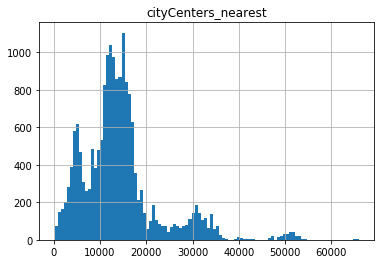

In [85]:
data.hist('cityCenters_nearest', bins=100)

Сегмент с удаленностью выше 20 км можно выделить отдельно. Внутри этого диапазон посмотрим внимательнее. Уменьшим количество корзин, чтобы примерно понимать размер сегмента.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f2e56908>]],
      dtype=object)

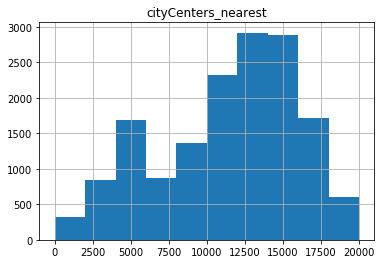

In [86]:
data.hist('cityCenters_nearest', bins=10, range=[0,20000])

На основе гистограммы выделим 4 сегмента по удаленности: до 5км, 5-10км, 10-15 км, 15-20 км, свыше 20км.  
Назовем ближний сегмент "Центр" (условно, но ведь нам нужны крупные сегменты, мы не можем ограничиваться только историческим центром), 10-15 км - "Ближние новые районы", 15-20 км - "Дальние новые районы", более 20 км - "Пригороды и область"

In [87]:
def centre_distance(distance):
    if distance < 10000:
        return 'Центр'
    if 10000 <= distance < 15000:
        return 'Ближние новые районы'
    if 15000 <= distance < 20000:
        return 'Дальние новые районы'
    if distance >= 20000:
        return 'Пригороды и область'
data['centre_distance'] = data['cityCenters_nearest'].apply(centre_distance)
print(data['centre_distance'].value_counts())

Ближние новые районы    6759
Центр                   5097
Дальние новые районы    3692
Пригороды и область     2632
Name: centre_distance, dtype: int64


In [88]:
sample = data.query('10000 <= price_per_sqm <= 300000 and total_area <= 250') # еще раз создадим датафрейм sample с новым столбцом

In [89]:
print(sample.pivot_table(index='centre_distance', columns='rooms_grouped', values='total_area', aggfunc='count'))

rooms_grouped         1-комнатная  2-комнатная  3-комнатная  4-комнатная  \
centre_distance                                                            
Ближние новые районы         2431         2329         1624          272   
Дальние новые районы         1501         1134          901           99   
Пригороды и область           973          875          647          102   
Центр                         964         1558         1461          538   

rooms_grouped         5 комнат и больше  Открытая планировка  Студия  
centre_distance                                                       
Ближние новые районы                 35                   17      38  
Дальние новые районы                 18                    7      26  
Пригороды и область                  20                    4       6  
Центр                               316                    7      22  


Количество комнат не является однозначным основанием для деления квартир на сегменты: могут существовать относительно большие "двушки" и крошечные 4-комнатные "хрущевки". Надежнее сегментировать по площади.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f6a7d4e0>]],
      dtype=object)

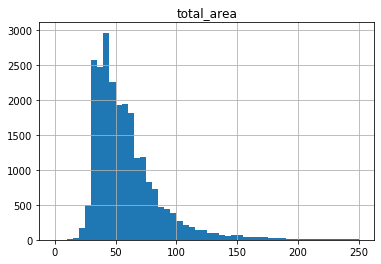

In [90]:
data.hist('total_area', bins=50, range=(0,250))

Взглянем детальнее на квартиры до 100 м.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd1f3654e80>]],
      dtype=object)

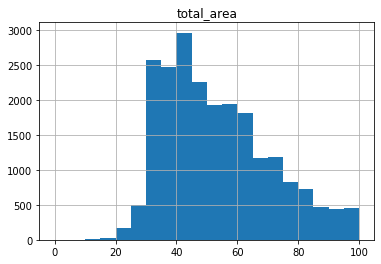

In [91]:
data.hist('total_area', bins=20, range=(0,100))

Видимо, имеет смысл выделить небольшие квартиры до 40 метров, средний и очень распространенный сегмент от 40 до 60 метров, вместительные квартиры от 60 до 100 метров, большие квартиры более 100метров. Создадим сегменты и взглянем на размер получившихся сегментов.

In [92]:
def total_area_grouped(total_area):
    if total_area < 40:
        return 'Маленькие'
    if 40 <= total_area < 60:
        return 'Средние'
    if 60 <= total_area < 100:
        return 'Просторные'
    if total_area >= 100:
        return 'Большие'
data['total_area_grouped'] = data['total_area'].apply(total_area_grouped)
print(data['total_area_grouped'].value_counts(dropna=False))

Средние       9074
Просторные    6990
Маленькие     5727
Большие       1908
Name: total_area_grouped, dtype: int64


In [93]:
sample = data.query('10000 <= price_per_sqm <= 300000 and total_area <= 250') # еще раз создадим датафрейм sample с новым столбцом
print(sample.pivot_table(index='centre_distance', columns='total_area_grouped', values='total_area', aggfunc='count')) # выведем в разбивке по районам

total_area_grouped    Большие  Маленькие  Просторные  Средние
centre_distance                                              
Ближние новые районы      310       1695        1875     2866
Дальние новые районы      105       1007        1079     1495
Пригороды и область       116        703         772     1036
Центр                    1079        551        1916     1320


Выделим следующие сегменты:
    - Центр: маленькие и средние квартиры
    - Центр: большие и просторные квартиры
    - Новые районы (объединим ближние и дальние для простоты восприятия): отдельно маленькие/средние/большие и просторные
    - Пригороды и область: отдельный сегмент без разбивки

In [94]:
def apart_segment(row):
    total_area_grouped = row['total_area_grouped']
    centre_distance = row['centre_distance']
    if centre_distance == 'Центр' and (total_area_grouped == 'Маленькие' or total_area_grouped == 'Средние'):
        return 'Компактные квартиры в центре'
    if centre_distance == 'Центр' and (total_area_grouped == 'Большие' or total_area_grouped == 'Просторные'):
        return 'Просторные квартиры в центре'
    if (centre_distance == 'Ближние новые районы' or centre_distance == 'Дальние новые районы') and total_area_grouped == 'Маленькие':
        return 'Маленькие квартиры в новых районах' 
    if (centre_distance == 'Ближние новые районы' or centre_distance == 'Дальние новые районы') and total_area_grouped == 'Средние':
        return 'Средние квартиры в новых районах'     
    if (centre_distance == 'Ближние новые районы' or centre_distance == 'Дальние новые районы') and (total_area_grouped == 'Большие' or total_area_grouped == 'Просторные'):
        return 'Просторные квартиры в новых районах'
    if centre_distance == 'Пригороды и область':
        return 'Пригороды и область'
data['apart_segment'] = data.apply(apart_segment, axis=1)
print(data['apart_segment'].value_counts(dropna=False))

NaN                                    5519
Средние квартиры в новых районах       4361
Просторные квартиры в новых районах    3387
Просторные квартиры в центре           3216
Маленькие квартиры в новых районах     2703
Пригороды и область                    2632
Компактные квартиры в центре           1881
Name: apart_segment, dtype: int64


In [95]:
sample = data.query('10000 <= price_per_sqm <= 300000 and total_area <= 250') # еще раз выделим выборку

In [96]:
sample_segm = sample.query('apart_segment == "Компактные квартиры в центре"')
print("Корреляция цены за квадратный метр и общей площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['total_area'])))
print("Корреляция цены за квадратный метр и жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area'])))
print("Корреляция цены за квадратный метр и площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area'])))
print("Корреляция цены за квадратный метр и доли жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area_share'])))
print("Корреляция цены за квадратный метр и доли площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area_share'])))
print("Корреляция цены за квадратный метр и высоты потолков: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['ceiling_height_correct'])))
print("Корреляция цены за квадратный метр и удаленности от центра: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['cityCenters_nearest'])))
print("Корреляция цены за квадратный метр и длительности экспозиции объявления: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['days_exposition'])))
print("Корреляция цены за квадратный метр и расстояния до аэропорта: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['airports_nearest'])))

Корреляция цены за квадратный метр и общей площади: -0.11
Корреляция цены за квадратный метр и жилой площади: -0.29
Корреляция цены за квадратный метр и площади кухни: 0.35
Корреляция цены за квадратный метр и доли жилой площади: -0.31
Корреляция цены за квадратный метр и доли площади кухни: 0.33
Корреляция цены за квадратный метр и высоты потолков: 0.29
Корреляция цены за квадратный метр и удаленности от центра: -0.35
Корреляция цены за квадратный метр и длительности экспозиции объявления: 0.08
Корреляция цены за квадратный метр и расстояния до аэропорта: -0.12


Интересно, что и в центральной части города - чем ближе к центру, тем дороже. Кроме того, для компактных квартир имеет значение размер кухни и высота потолков. Чем больше квартира, тем дешевле стоит метр.

In [97]:
sample_segm = sample.query('apart_segment == "Просторные квартиры в центре"')
print("Корреляция цены за квадратный метр и общей площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['total_area'])))
print("Корреляция цены за квадратный метр и жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area'])))
print("Корреляция цены за квадратный метр и площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area'])))
print("Корреляция цены за квадратный метр и доли жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area_share'])))
print("Корреляция цены за квадратный метр и доли площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area_share'])))
print("Корреляция цены за квадратный метр и высоты потолков: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['ceiling_height_correct'])))
print("Корреляция цены за квадратный метр и удаленности от центра: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['cityCenters_nearest'])))
print("Корреляция цены за квадратный метр и длительности экспозиции объявления: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['days_exposition'])))
print("Корреляция цены за квадратный метр и расстояния до аэропорта: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['airports_nearest'])))

Корреляция цены за квадратный метр и общей площади: 0.09
Корреляция цены за квадратный метр и жилой площади: -0.04
Корреляция цены за квадратный метр и площади кухни: 0.32
Корреляция цены за квадратный метр и доли жилой площади: -0.27
Корреляция цены за квадратный метр и доли площади кухни: 0.28
Корреляция цены за квадратный метр и высоты потолков: 0.01
Корреляция цены за квадратный метр и удаленности от центра: 0.00
Корреляция цены за квадратный метр и длительности экспозиции объявления: 0.02
Корреляция цены за квадратный метр и расстояния до аэропорта: 0.07


Для просторных квартир в центре увеличение площади уже не приводит к снижению цены за метр. Но по-прежнему на цену положительно влияет размер кухни.

In [98]:
sample_segm = sample.query('apart_segment == "Маленькие квартиры в новых районах"')
print("Корреляция цены за квадратный метр и общей площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['total_area'])))
print("Корреляция цены за квадратный метр и жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area'])))
print("Корреляция цены за квадратный метр и площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area'])))
print("Корреляция цены за квадратный метр и доли жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area_share'])))
print("Корреляция цены за квадратный метр и доли площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area_share'])))
print("Корреляция цены за квадратный метр и высоты потолков: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['ceiling_height_correct'])))
print("Корреляция цены за квадратный метр и удаленности от центра: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['cityCenters_nearest'])))
print("Корреляция цены за квадратный метр и длительности экспозиции объявления: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['days_exposition'])))
print("Корреляция цены за квадратный метр и расстояния до аэропорта: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['airports_nearest'])))

Корреляция цены за квадратный метр и общей площади: -0.01
Корреляция цены за квадратный метр и жилой площади: -0.03
Корреляция цены за квадратный метр и площади кухни: 0.20
Корреляция цены за квадратный метр и доли жилой площади: -0.03
Корреляция цены за квадратный метр и доли площади кухни: 0.13
Корреляция цены за квадратный метр и высоты потолков: 0.25
Корреляция цены за квадратный метр и удаленности от центра: -0.23
Корреляция цены за квадратный метр и длительности экспозиции объявления: 0.01
Корреляция цены за квадратный метр и расстояния до аэропорта: -0.05


Для маленьких квартир в новых районах важное значение имеет размер кухни и высота потолков, а также удаленность от центра.

In [99]:
sample_segm = sample.query('apart_segment == "Средние квартиры в новых районах"')
print("Корреляция цены за квадратный метр и общей площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['total_area'])))
print("Корреляция цены за квадратный метр и жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area'])))
print("Корреляция цены за квадратный метр и площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area'])))
print("Корреляция цены за квадратный метр и доли жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area_share'])))
print("Корреляция цены за квадратный метр и доли площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area_share'])))
print("Корреляция цены за квадратный метр и высоты потолков: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['ceiling_height_correct'])))
print("Корреляция цены за квадратный метр и удаленности от центра: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['cityCenters_nearest'])))
print("Корреляция цены за квадратный метр и длительности экспозиции объявления: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['days_exposition'])))
print("Корреляция цены за квадратный метр и расстояния до аэропорта: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['airports_nearest'])))

Корреляция цены за квадратный метр и общей площади: -0.11
Корреляция цены за квадратный метр и жилой площади: -0.36
Корреляция цены за квадратный метр и площади кухни: 0.42
Корреляция цены за квадратный метр и доли жилой площади: -0.39
Корреляция цены за квадратный метр и доли площади кухни: 0.41
Корреляция цены за квадратный метр и высоты потолков: 0.38
Корреляция цены за квадратный метр и удаленности от центра: -0.16
Корреляция цены за квадратный метр и длительности экспозиции объявления: 0.00
Корреляция цены за квадратный метр и расстояния до аэропорта: 0.08


Цена на квартиры среднего размера в новых районах зависит от целого ряда факторов:
    - размер кухни и ее доля в жилой площади;
    - высота потолков;
    - слабая связь с расстоянием до центра.

In [100]:
sample_segm = sample.query('apart_segment == "Просторные квартиры в новых районах"')
print("Корреляция цены за квадратный метр и общей площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['total_area'])))
print("Корреляция цены за квадратный метр и жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area'])))
print("Корреляция цены за квадратный метр и площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area'])))
print("Корреляция цены за квадратный метр и доли жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area_share'])))
print("Корреляция цены за квадратный метр и доли площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area_share'])))
print("Корреляция цены за квадратный метр и высоты потолков: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['ceiling_height_correct'])))
print("Корреляция цены за квадратный метр и удаленности от центра: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['cityCenters_nearest'])))
print("Корреляция цены за квадратный метр и длительности экспозиции объявления: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['days_exposition'])))
print("Корреляция цены за квадратный метр и расстояния до аэропорта: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['airports_nearest'])))

Корреляция цены за квадратный метр и общей площади: 0.22
Корреляция цены за квадратный метр и жилой площади: 0.01
Корреляция цены за квадратный метр и площади кухни: 0.39
Корреляция цены за квадратный метр и доли жилой площади: -0.36
Корреляция цены за квадратный метр и доли площади кухни: 0.35
Корреляция цены за квадратный метр и высоты потолков: 0.38
Корреляция цены за квадратный метр и удаленности от центра: -0.28
Корреляция цены за квадратный метр и длительности экспозиции объявления: -0.01
Корреляция цены за квадратный метр и расстояния до аэропорта: 0.10


Для просторных квартир в новых районах также выделяются прежние факторы - размер кухни, высота потолков и удаленность от центра.  
Интересно, что увеличение площади для элитного жилья приводит к увеличению стоимости за метр!

In [101]:
sample_segm = sample.query('apart_segment == "Пригороды и область"')
print("Корреляция цены за квадратный метр и общей площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['total_area'])))
print("Корреляция цены за квадратный метр и жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area'])))
print("Корреляция цены за квадратный метр и площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area'])))
print("Корреляция цены за квадратный метр и доли жилой площади: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['living_area_share'])))
print("Корреляция цены за квадратный метр и доли площади кухни: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['kitchen_area_share'])))
print("Корреляция цены за квадратный метр и высоты потолков: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['ceiling_height_correct'])))
print("Корреляция цены за квадратный метр и удаленности от центра: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['cityCenters_nearest'])))
print("Корреляция цены за квадратный метр и длительности экспозиции объявления: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['days_exposition'])))
print("Корреляция цены за квадратный метр и расстояния до аэропорта: {:.2f}".format(sample_segm['price_per_sqm'].corr(sample_segm['airports_nearest'])))

Корреляция цены за квадратный метр и общей площади: -0.03
Корреляция цены за квадратный метр и жилой площади: -0.10
Корреляция цены за квадратный метр и площади кухни: 0.23
Корреляция цены за квадратный метр и доли жилой площади: -0.21
Корреляция цены за квадратный метр и доли площади кухни: 0.27
Корреляция цены за квадратный метр и высоты потолков: 0.25
Корреляция цены за квадратный метр и удаленности от центра: -0.15
Корреляция цены за квадратный метр и длительности экспозиции объявления: 0.02
Корреляция цены за квадратный метр и расстояния до аэропорта: -0.04


Размер кухни и высота потолков имеют значения и для квартир в пригородах и области.

Из значимых параметров еще стоит посмотреть на этажность.

In [102]:
print(sample.pivot_table(index='apart_segment', columns='floor_grouped', values='price_per_sqm', aggfunc='median'))

floor_grouped                          Другой  Неизвестно    Первый  Последний
apart_segment                                                                 
Компактные квартиры в центре         121052.0    118423.5  107112.0   111904.0
Маленькие квартиры в новых районах   109008.5    110956.0  100000.0   105509.5
Пригороды и область                   83596.0     90600.0   78620.0    82453.0
Просторные квартиры в новых районах  100370.5     93779.0   84670.5    96284.5
Просторные квартиры в центре         120041.0    138253.0  100000.0   110240.0
Средние квартиры в новых районах     100000.0    106632.0   86424.5    92100.5


За первый этаж всегда просят меньше, а вот скидка за последний заметно ниже в новых районах и пригородах, чем в центре.

### Апартаменты, студии, квартиры свободной планировки

В исходном датафрейме создадим столбец, в котором выделим апартаменты/студии/квартиры свободной планировки/обычное жилье.  
Проверим, являются ли эти три типа квартир пересекающимися множествами.

In [103]:
print(data.query('is_apartment == True and studio == True')['total_area'].count())
print(data.query('is_apartment == True and open_plan == True')['total_area'].count())
print(data.query('open_plan == True and studio == True')['total_area'].count())

0
0
0


In [104]:
def object_type(row):
    is_apartment = row['is_apartment']
    studio = row['studio']
    open_plan = row['open_plan']
    if is_apartment == True:
        return 'Апартаменты'
    if studio == True:
        return 'Студия'
    if open_plan == True:
        return 'Открытая планировка'
    else:
        return 'Обычная квартира'
data['object_type'] = data.apply(object_type, axis=1)
print(data['object_type'].value_counts())

Обычная квартира       23433
Студия                   149
Открытая планировка       67
Апартаменты               50
Name: object_type, dtype: int64


In [105]:
sample = data.query('10000 <= price_per_sqm <= 300000 and total_area <= 250') # еще раз выделим выборку

In [106]:
print(sample.pivot_table(index='object_type', values='price_per_sqm', aggfunc=['min', 'max','median']))

                              min           max        median
                    price_per_sqm price_per_sqm price_per_sqm
object_type                                                  
Апартаменты                 40816        278000      107911.5
Обычная квартира            10185        300000       94573.0
Открытая планировка         48133        160990      100000.0
Студия                      34375        231960      105555.0


Стоимость за метр может сильно колебаться для разных типов квартир. В целом, цена ниже для обычных квартир и выше - для студий и апартаментов.  
Можно еще взглянуть на распределения для каждого из типов объектов.

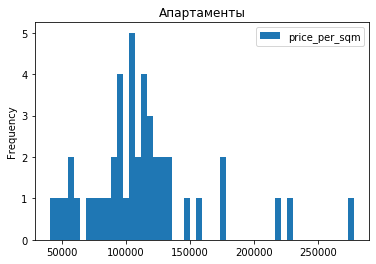

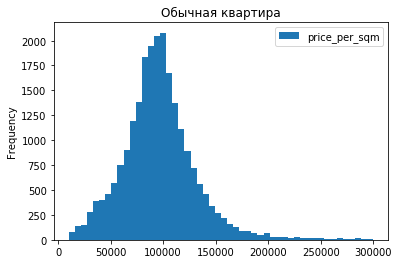

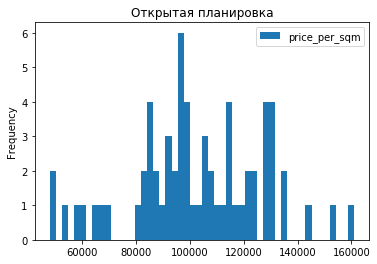

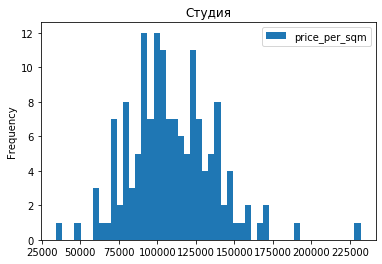

In [107]:
for objects, group_data in sample.groupby('object_type'):
    group_data.plot(y='price_per_sqm', title=objects, kind='hist', bins=50)

Для обычных квартир распределение нормальное, для студий - близко к таковому. Для апартаментов и квартир с открытой планировкой недостаточно данных.  
А выглядят распределения и основные параметры по общей площади?

                           min        max     median
                    total_area total_area total_area
object_type                                         
Апартаменты               20.1      245.8       58.0
Обычная квартира          12.0      250.0       52.0
Открытая планировка       16.0       97.2       27.0
Студия                    15.5       98.4       26.0


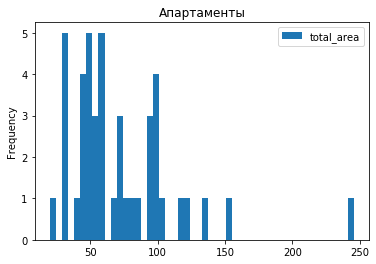

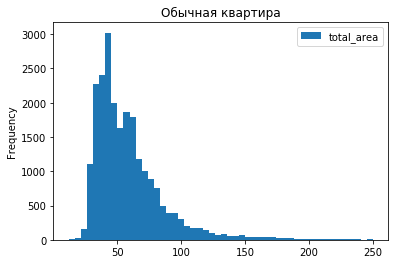

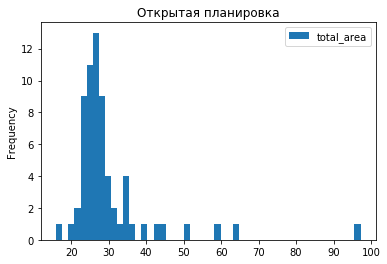

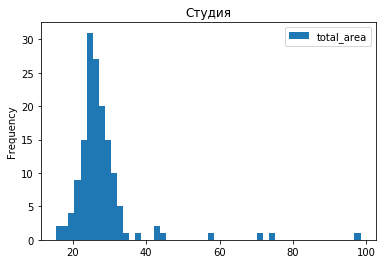

In [108]:
print(sample.pivot_table(index='object_type', values='total_area', aggfunc=['min', 'max','median']))
for objects, group_data in sample.groupby('object_type'):
    group_data.plot(y='total_area', title=objects, kind='hist', bins=50)

Типичные параметры для квартир и апартаментов близки (в среднем, общая площадь таких объектов 50-60 квадратных метров.  
Студии квартиры с открытой планировкой, в среднем, в 2 раза меньше.  
Еще интересно взглянуть, есть ли различия с точки зрения местоположения объектов.

In [109]:
print(sample.pivot_table(index='object_type', columns='centre_distance', values='total_area', aggfunc='count')) 

centre_distance      Ближние новые районы  Дальние новые районы  \
object_type                                                       
Апартаменты                             7                     1   
Обычная квартира                     6684                  3652   
Открытая планировка                    17                     7   
Студия                                 38                    26   

centre_distance      Пригороды и область  Центр  
object_type                                      
Апартаменты                           19     10  
Обычная квартира                    2598   4827  
Открытая планировка                    4      7  
Студия                                 6     22  


Явных трендов здесь нет, во многом, из-за недостаточного количества объектов по типам, отличным от обычных квартир.  
Посмотрим, есть ли зависимость цены за квадратный метр от площади по различным типам объектов.

In [110]:
print(sample.pivot_table(index='object_type', columns='total_area_grouped', values='price_per_sqm', aggfunc='median')) 

total_area_grouped    Большие  Маленькие  Просторные   Средние
object_type                                                   
Апартаменты          115000.0   120751.0    101294.5  104070.5
Обычная квартира     114655.0    98961.5     93200.0   90073.5
Открытая планировка       NaN   102222.0    104363.5   68988.0
Студия                    NaN   104901.5    115492.0  128319.5


Для апартаментов и обычных квартир тренд схожий: просторные и средние квартиры дешевле за квадратный метр, чем маленькие, но элитные большие квартиры стоят уже больше, чем "однушки" в пересчете на метр.
Для остальных типов объектов данные странные, что связано, по всей видимости, с недостаточностью выборки.

### Результаты анализа

После анализа данных можно сделать следующие выводы.  
1. Стоимость подавляющей части квартир в Петербурге и Ленинградской области колеблется от 20 тысяч до 160 тысяч рублей за квадратный метр, с ощутимым элитным сегментом, в котором цена может достигать 300 тысяч за кв.м.
2. Общая площадь большинства квартир находится в диапазоне от 20 до 100 кв.м с медианным значением около 50 кв.м.
3. Были выявлены следующие взаимосвязи цены за квадратный метр с различными параметрами квартир.    
  A. Стоимость имеет отрицательную корреляцию с расстоянием до центра города: чем дальше от центра, тем дешевле метр.  
  B. Чем больше площадь кухни и доля кухни в общей площади, тем дороже квадартный метр жилья. По всей видимости, здесь отразилась тенденция в новых домах, особенно комфорт и элит класса, делать большие кухни-гостиные.  
  C. Взаимосвязь цены за метр с общей площадью квартир и количеством комнат неоднозначна.  
  - С одной стороны, метр в студиях и однокомнатных квартирах стоит дороже, чем в 2-4 комнатных квартирах среднего и даже большого метража.
  - С другой стороны, большие элитные квартиры могут стоить дороже за метр, чем студии, что связано с дороговизной этого сегмента жилья.  
  
  D. Этаж влияет на цену за метр довольно сильно, особенно большой дисконт дает первый этаж; в среднем, дешевле стоит метр и на последнем этаже.  
  E. В Петербурге, где катастрофически не хватает водоемов и зеленых зон, наличие парка или водоема поблизости заметно увеличивает стоимость метра.  
  G. При анализе все выборки, практически нет зависимости между ценой за квадратный метр и расстоянием до аэропорта, высотой потолков, длительностью экспозиции объявления, жилой площадью.  
4. Квартиры в пригороде и области ожидаемо дешевле, чем жилье в самом Петербурге. Среди крупных пригородов только в Пушкине цена близка к Петербургу. В Парголово и Кудрово цена за квадратный метр ниже в среднем на 10%, а в Выборге аж на 40%.
5. Анализ факторов, влияющих на стоимость квадратного метра, в разрезе сегментов показывает, что индикатором жилья комфорт и элит классов, помимо размера кухни и удаленности от центра, является высота потолков: в различных сегментах квартиры с более высокими потолками при прочих равных стоят дороже.